## SANKAR SIVASAMY
Project 2 -DIABETES ANALYSIS

DATA ANALYSIS INTERN 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting the dataset 
df = pd.read_csv("D:\Datasets\Diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome       Results  
0                       0.627   50        1      Diabetes  
1                       0.351   31        0  Not Diabetes  
2                       0.672   32        1      Diabetes  
3                       0.167   21        0  Not Diabetes  
4                       2.288   33        1      Diabetes  
..                        ...  ...      ...           ...  
763                     0.171   63        0  Not Diabetes  
764                     0.340   27        0  Not Diabetes  
765                     0.245   30        0  Not Diabetes  
766                     0.349   47        1      Diabetes  
767                     0.315   23        0  Not Diabetes  

[768 rows x 10 columns]

In [3]:
#I added the result column for othher purposes but for our model we dont need it right now so droppping it 
df=df.drop(["Results"],axis="columns")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above results we can tell that there is no empty fielts in the dataset

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
#now we will check for 0 values is table
df_1=df.copy(deep=True)
df_1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df_1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
df_1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

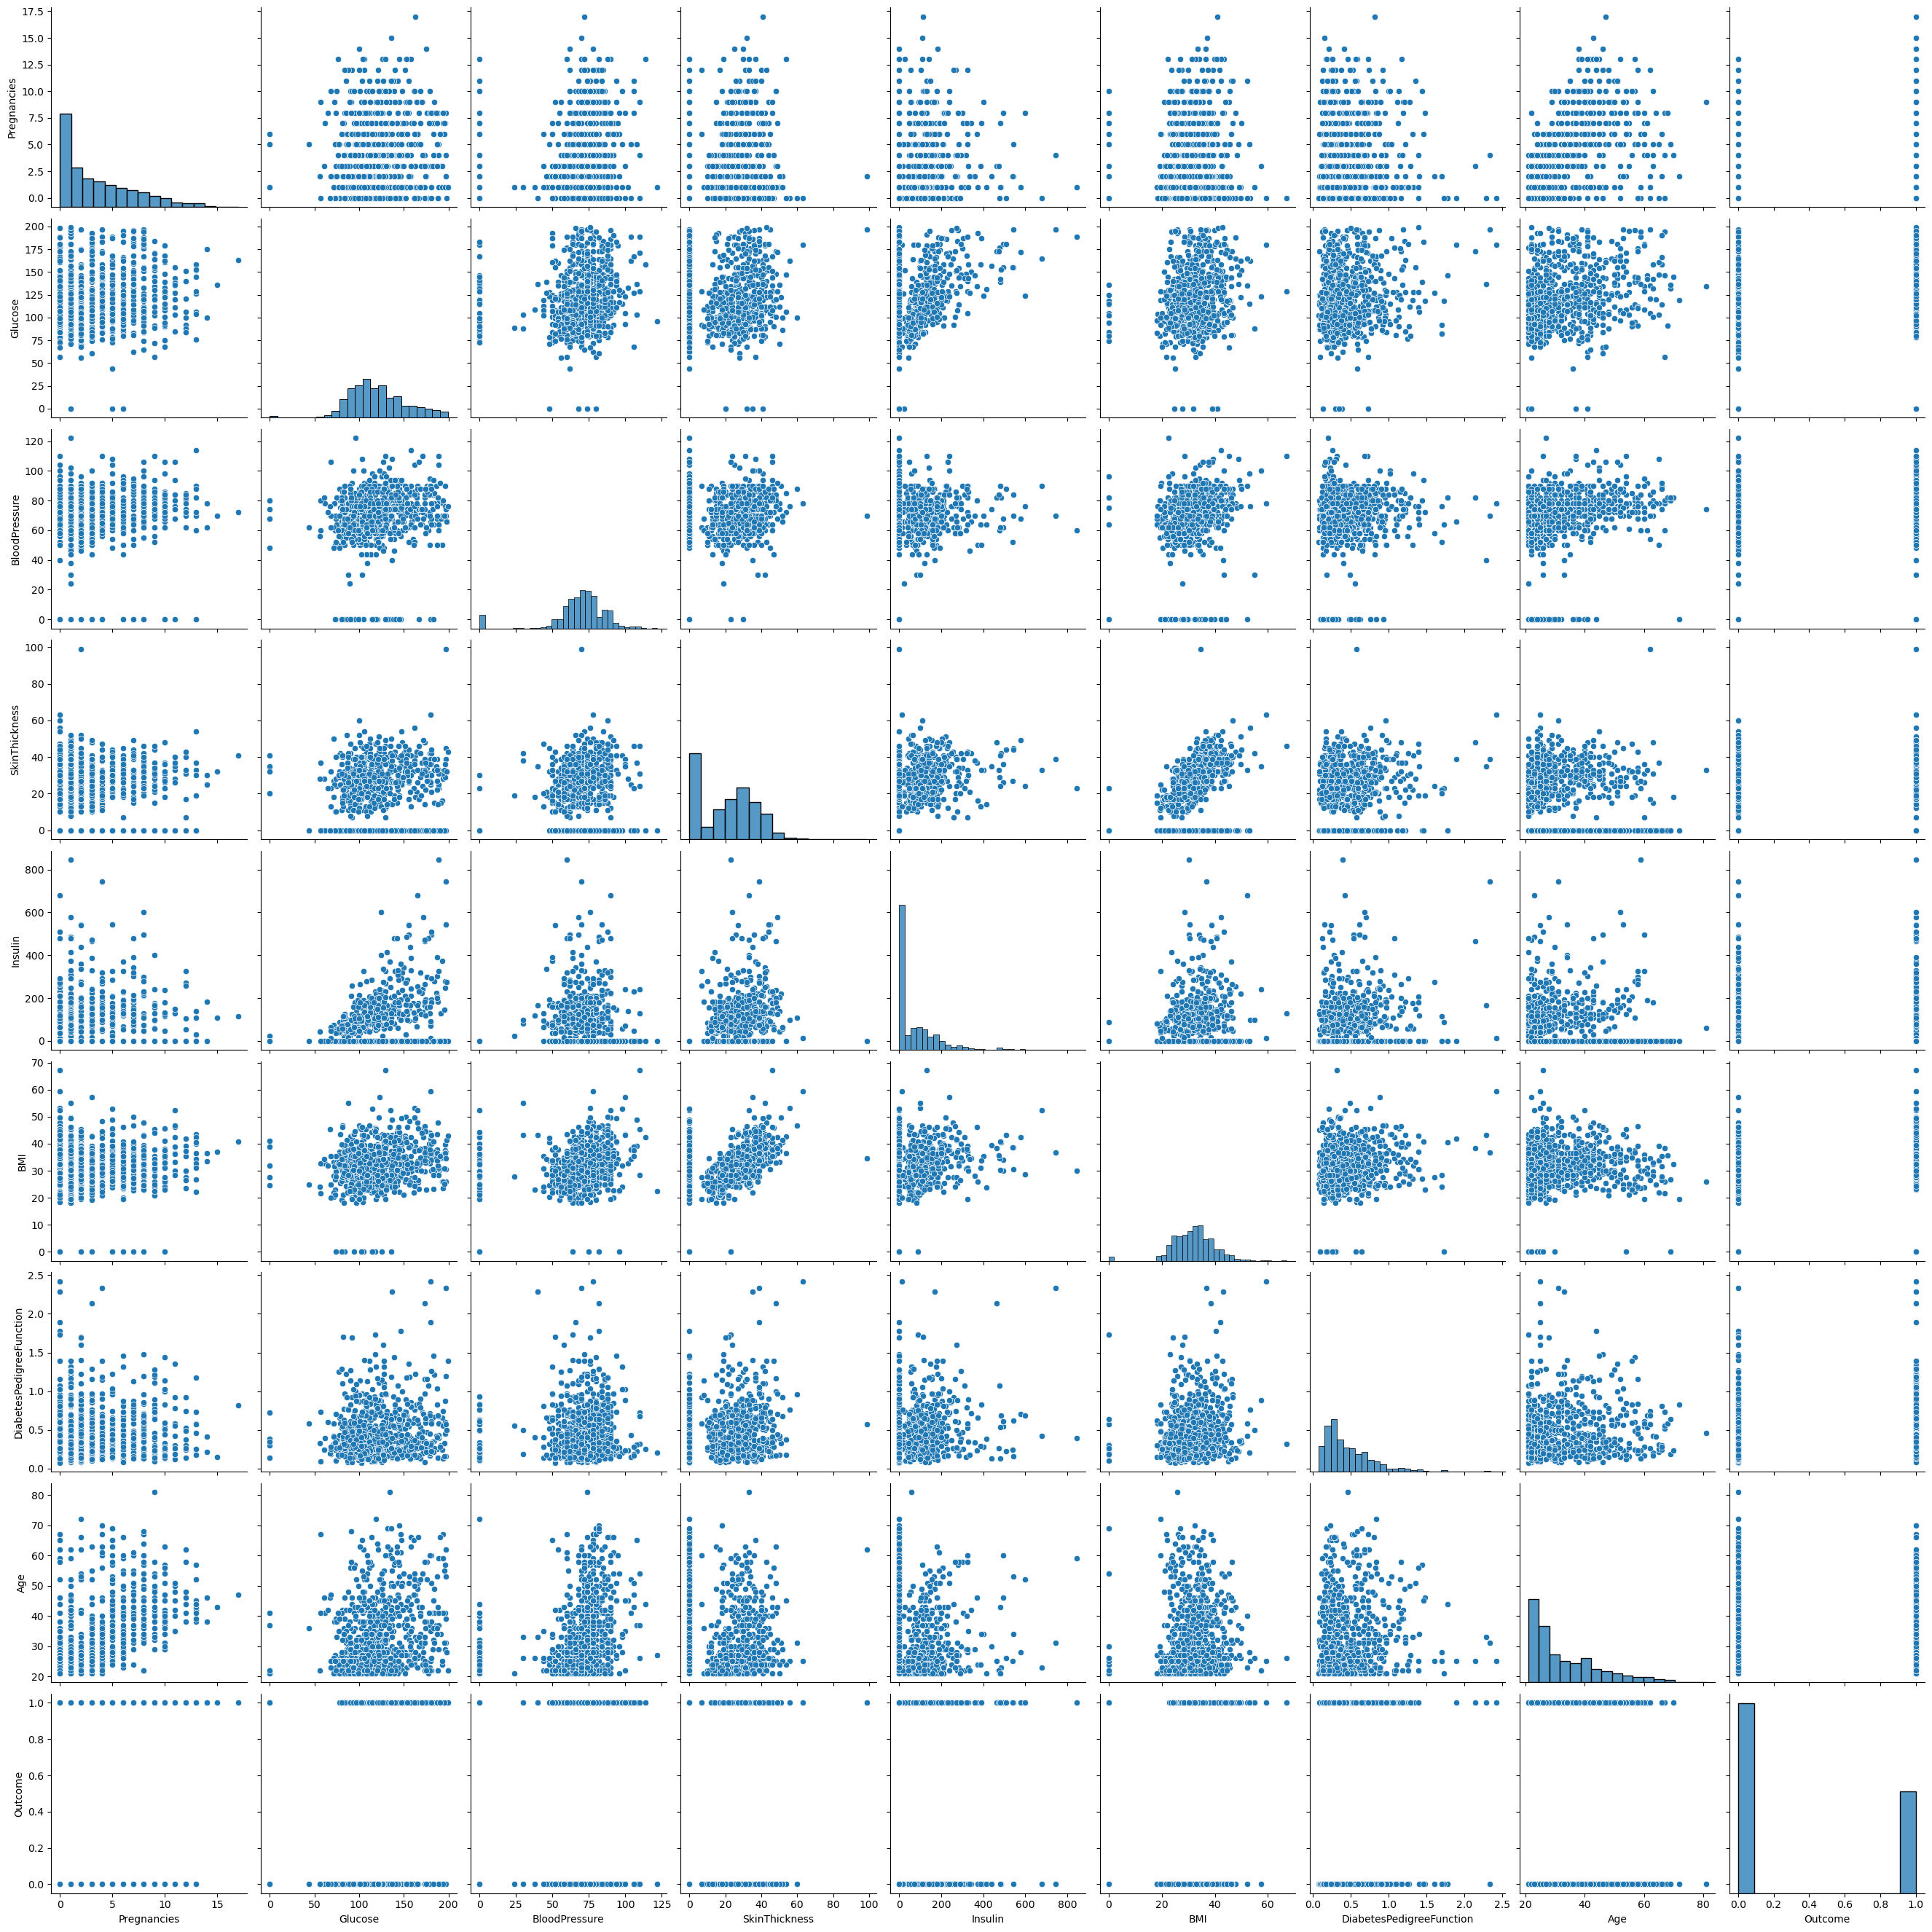

In [9]:
#Now visualise our dataset 
sns.pairplot(data=df,height=3)

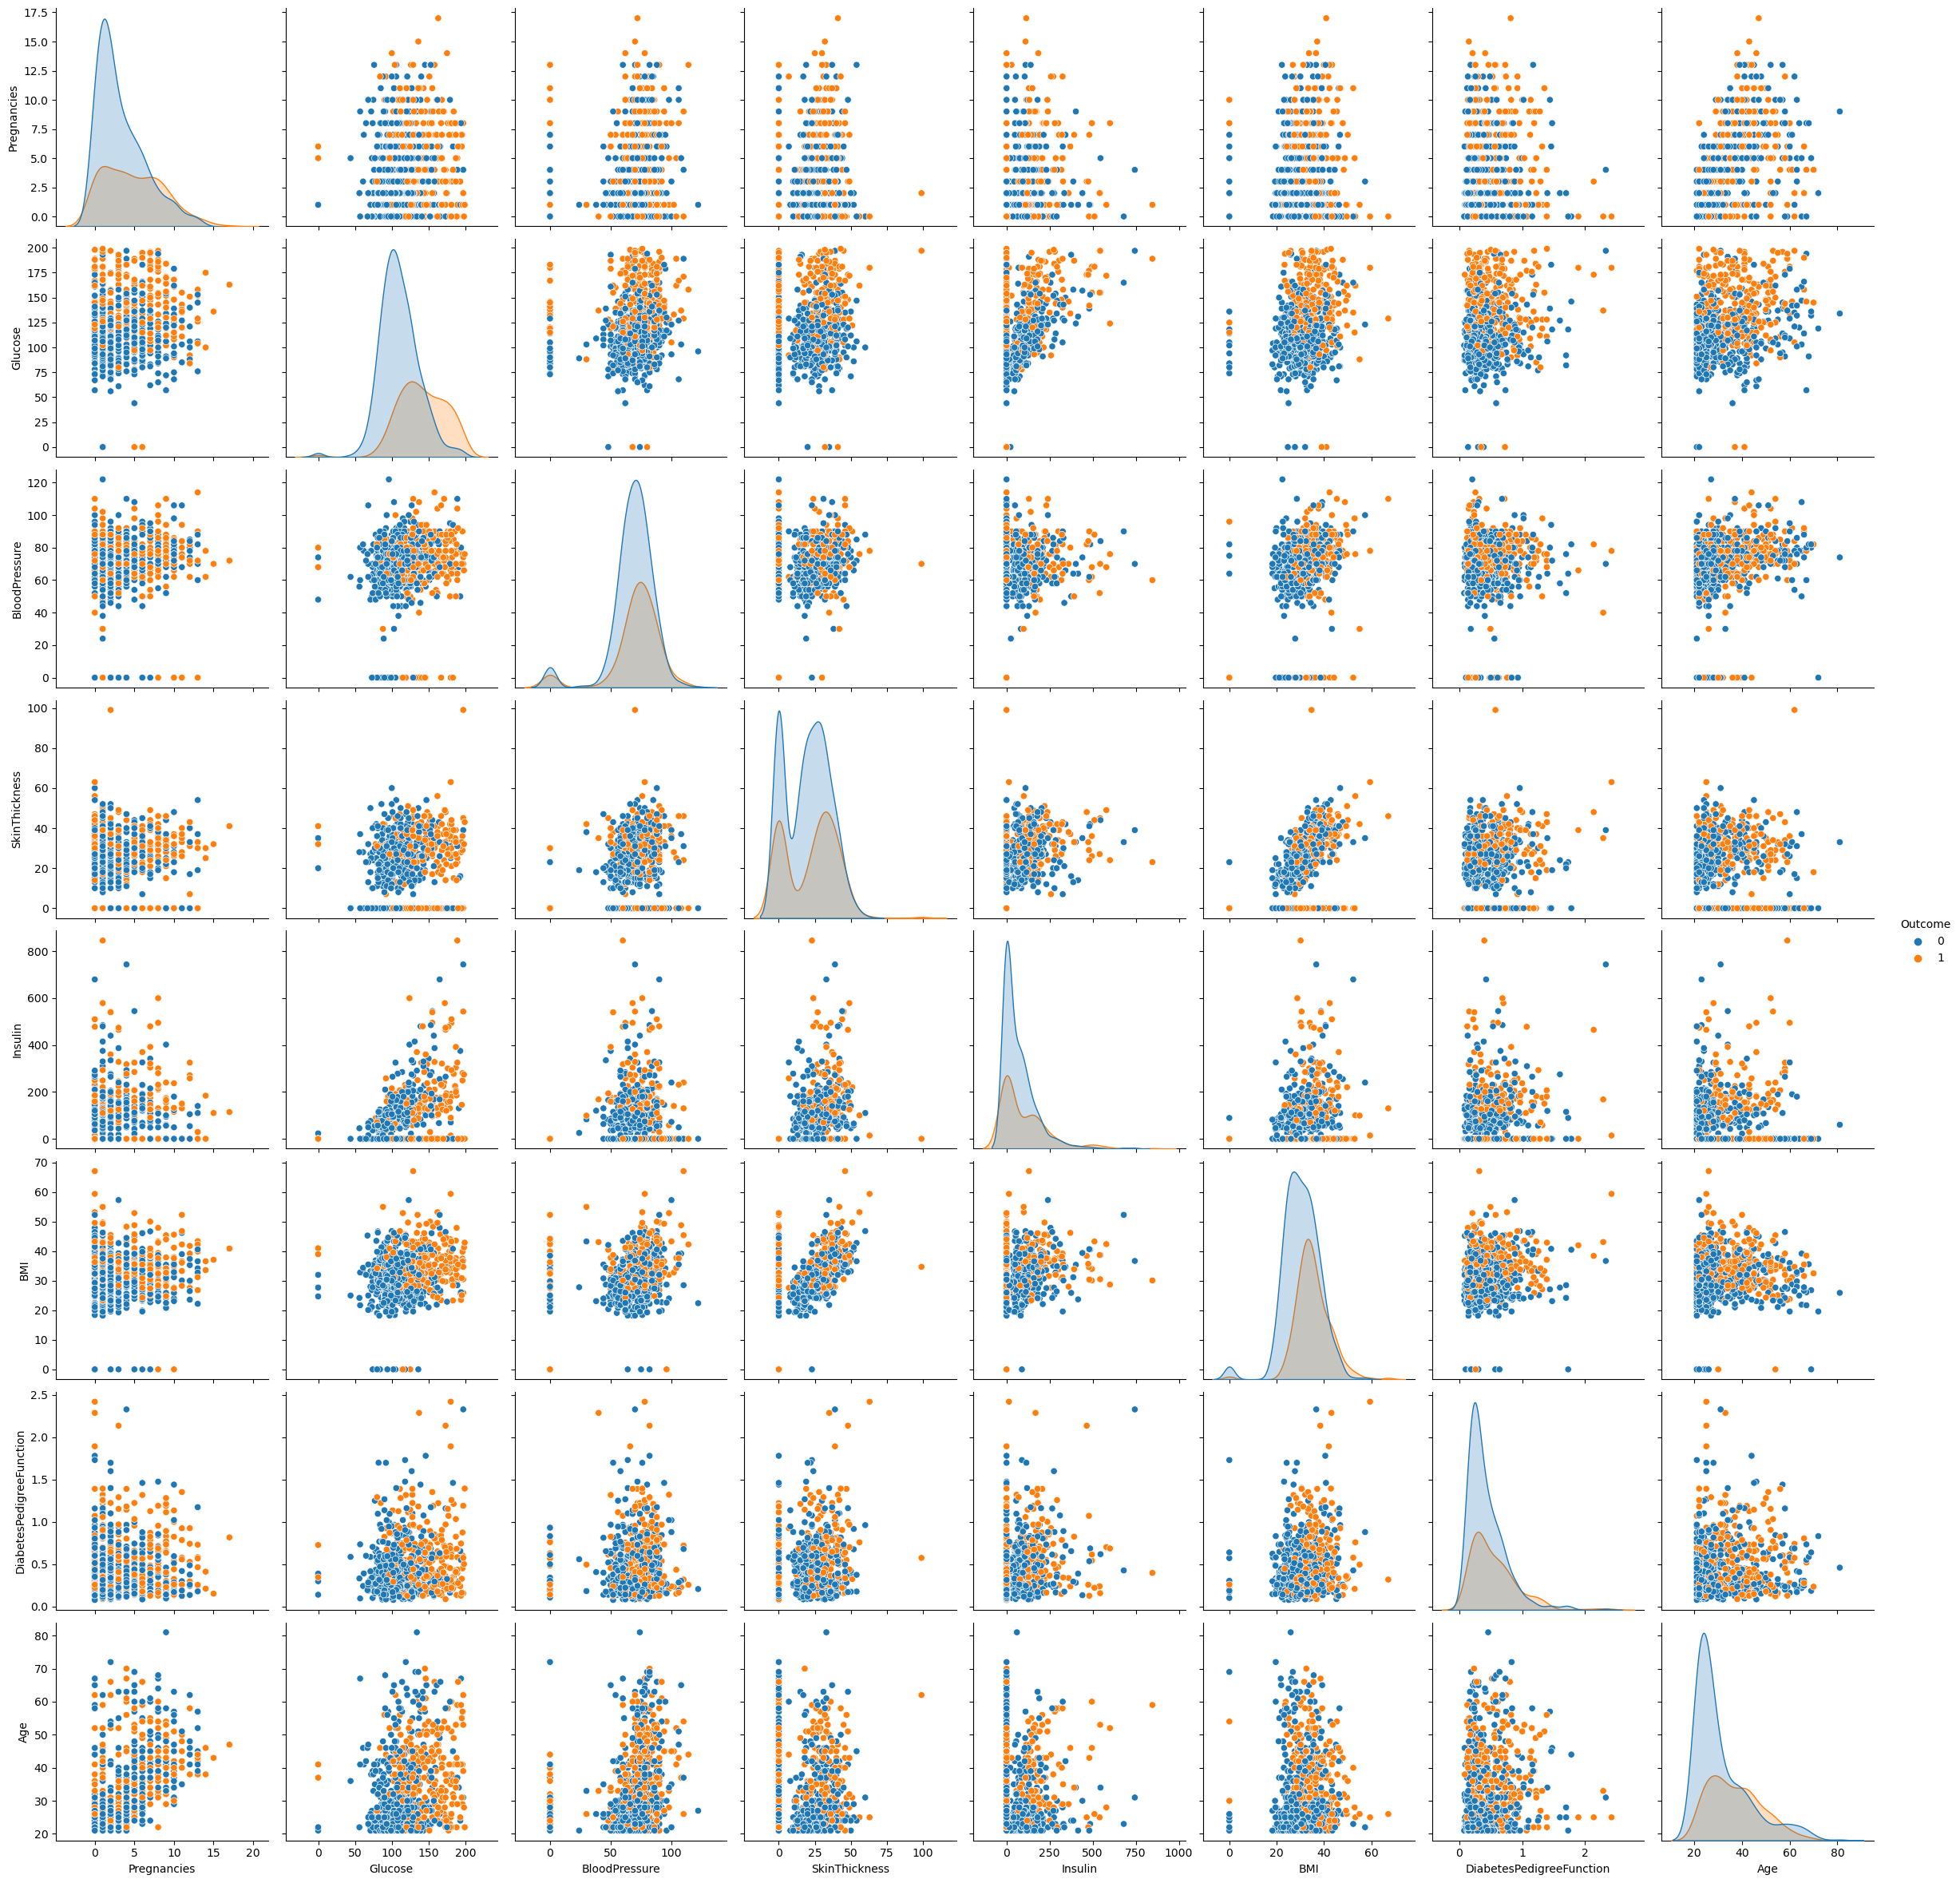

In [10]:
sns.pairplot(data=df,height=3,hue='Outcome')

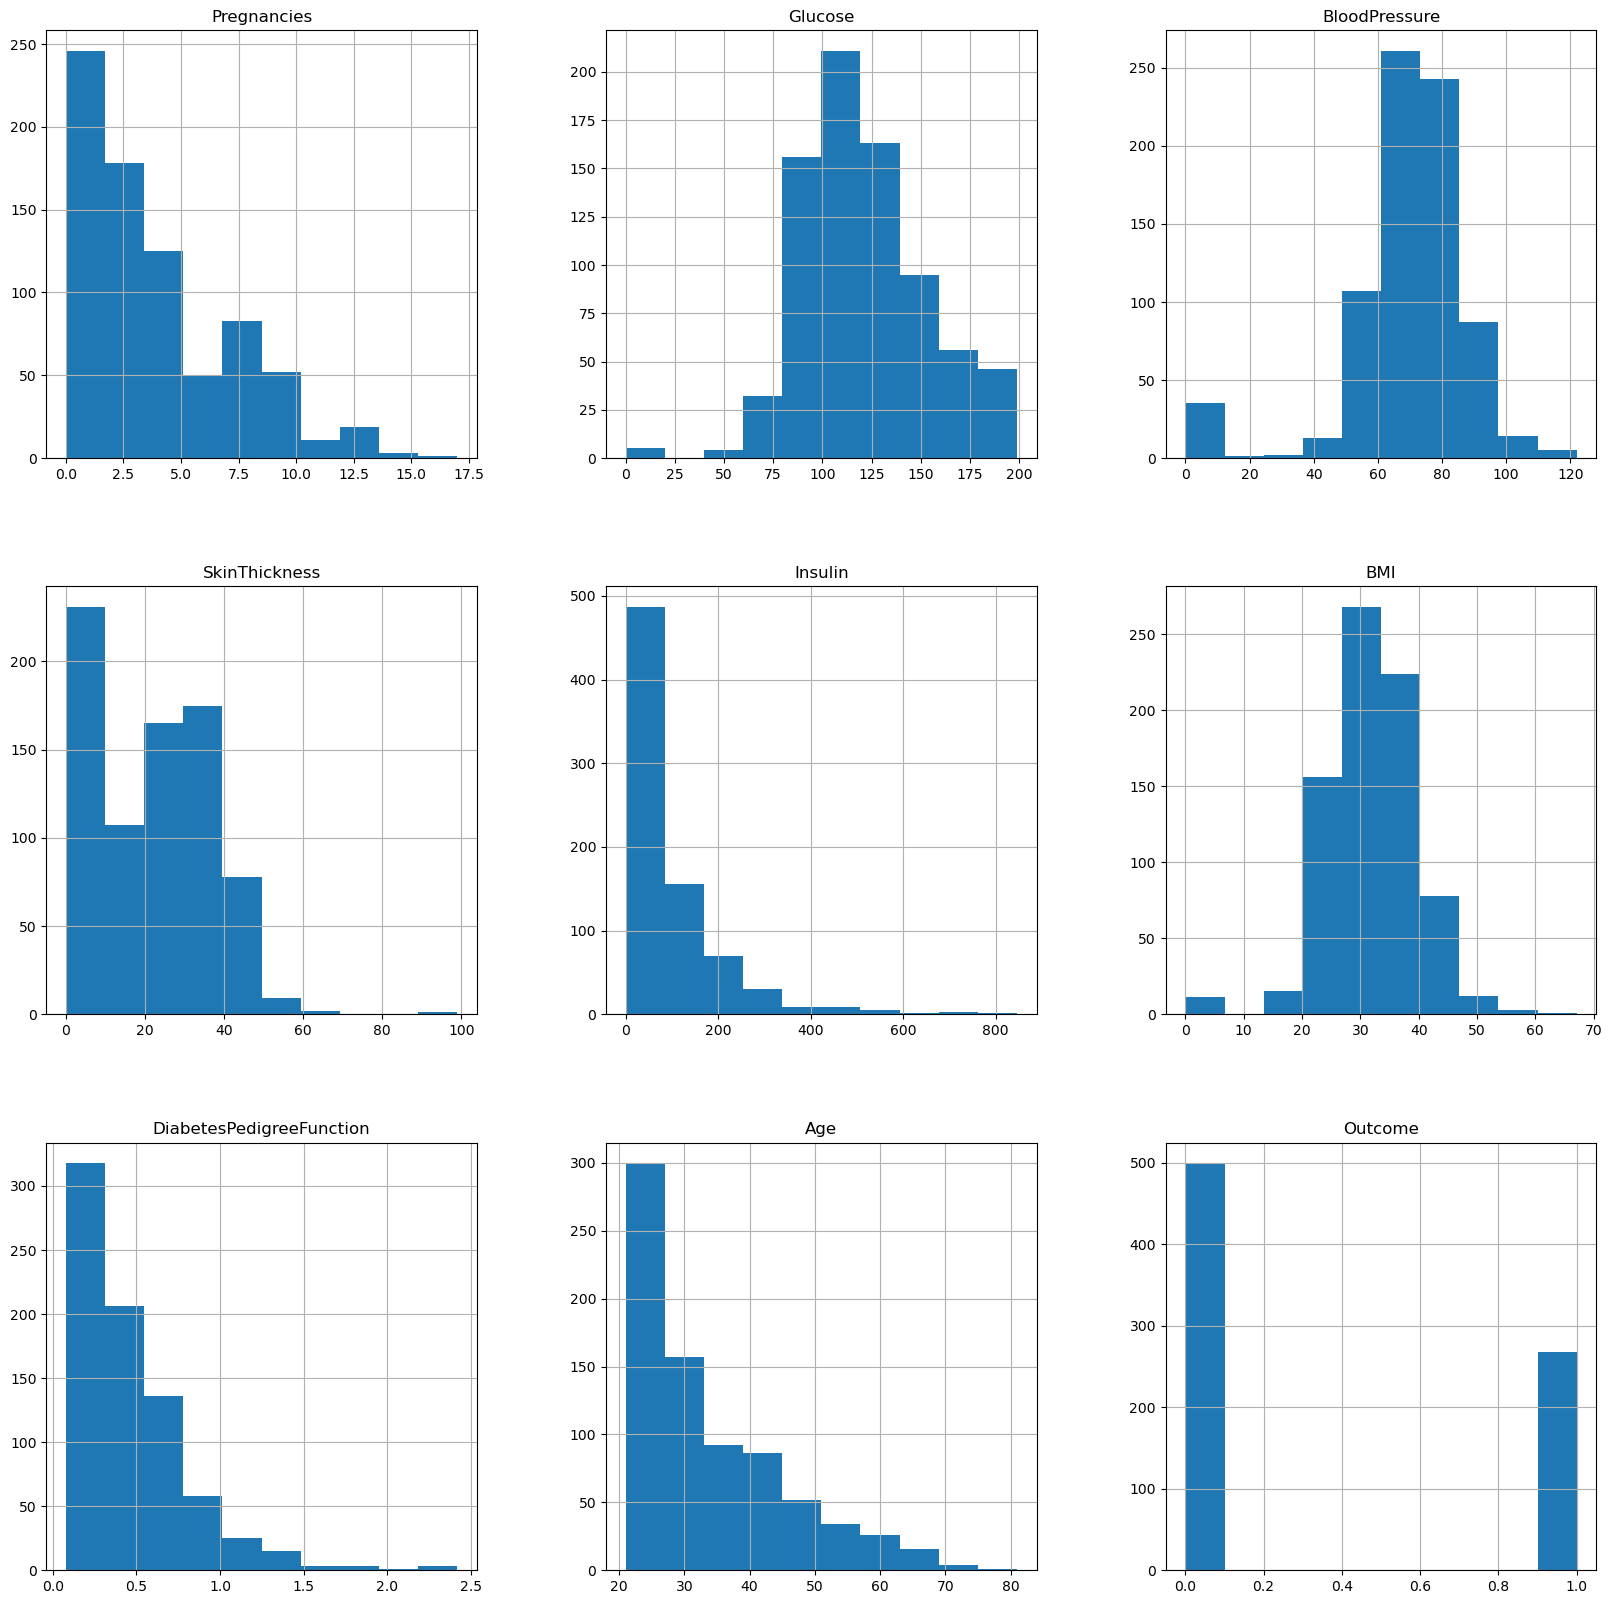

In [11]:
#Histogram plot
hist_plot = df.hist(figsize=(20,20))

In [12]:
import missingno as mno

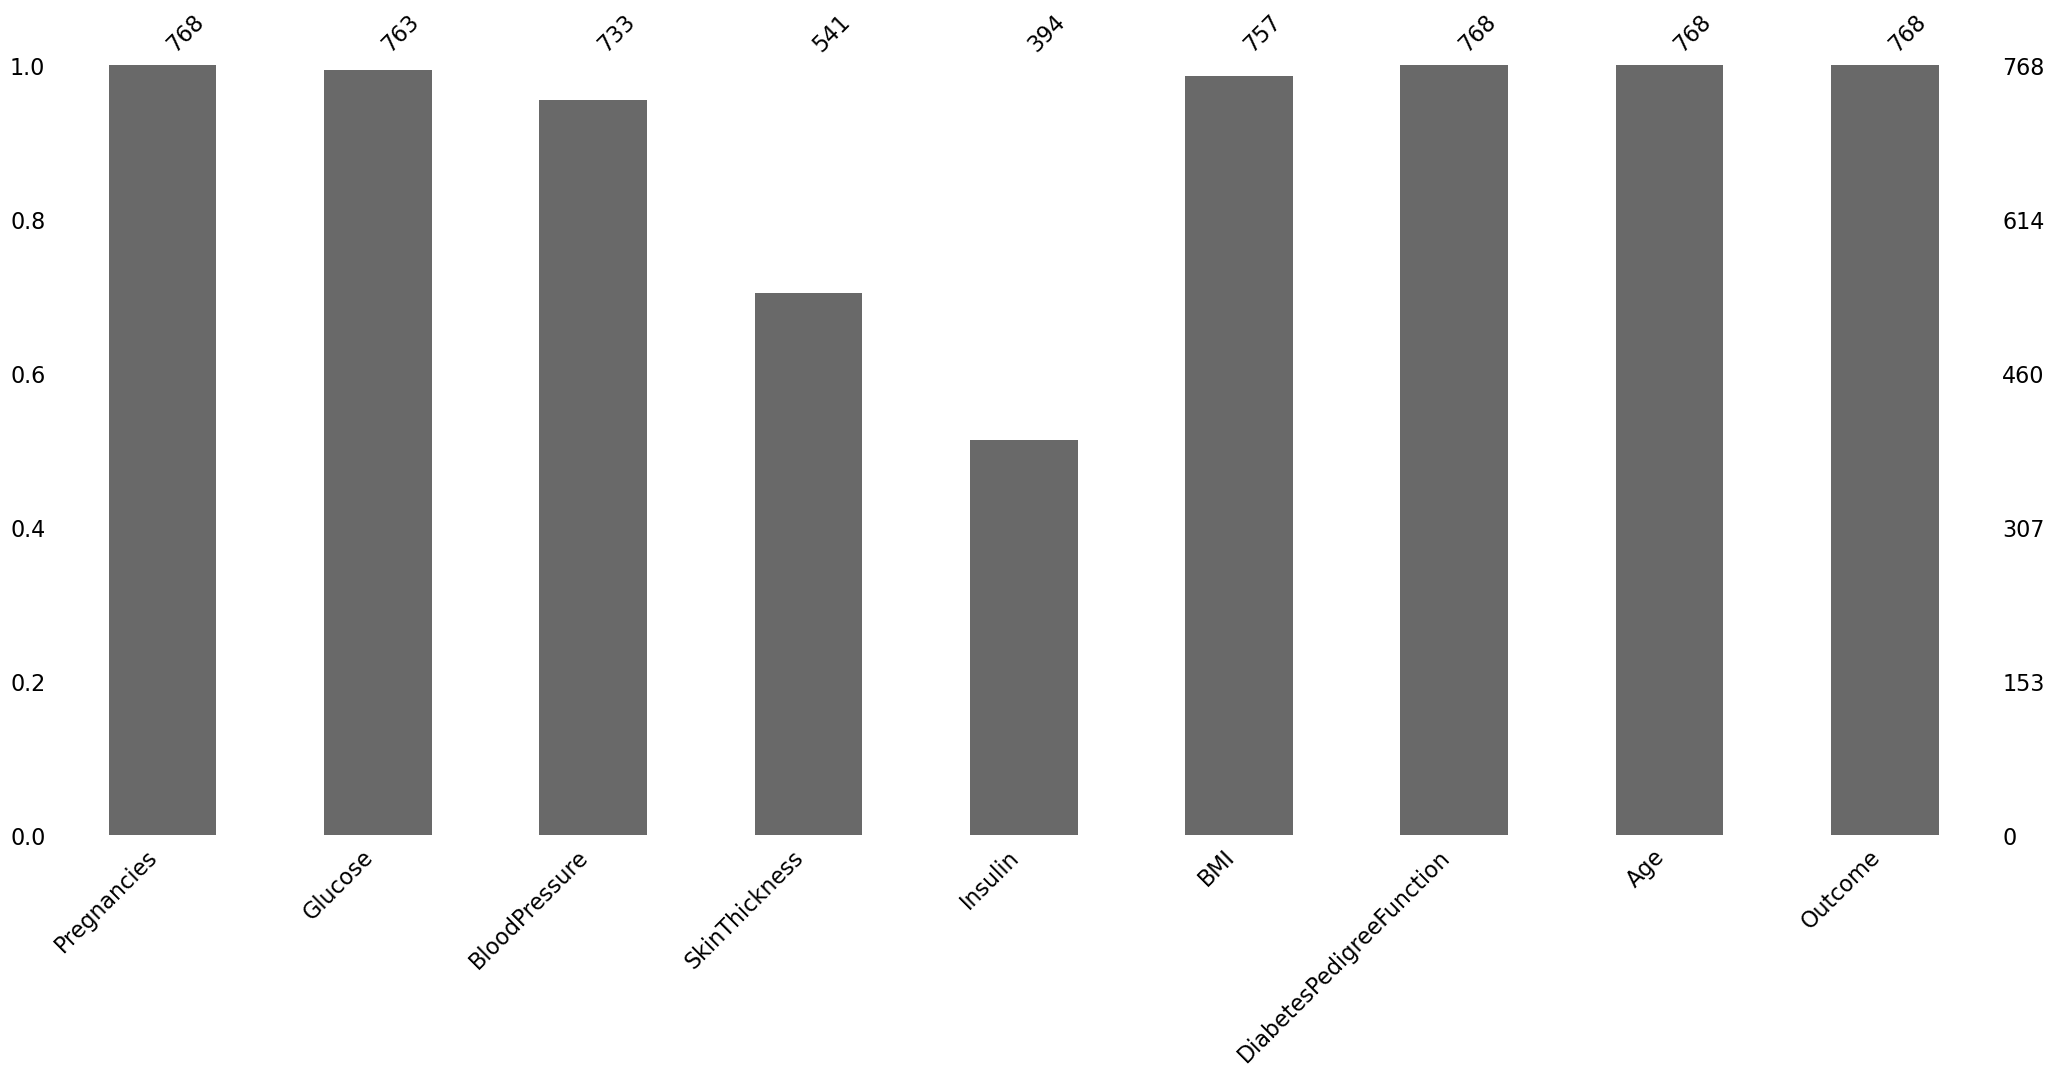

In [13]:
plot=mno.bar(df_1)

In [14]:
df_1['Glucose'].fillna(df_1['Glucose'].mean(),inplace=True)
df_1['BloodPressure'].fillna(df_1['BloodPressure'].mean(),inplace=True)
df_1['SkinThickness'].fillna(df_1['SkinThickness'].median(),inplace=True)
df_1['Insulin'].fillna(df_1['Insulin'].median(),inplace=True)
df_1['BMI'].fillna(df_1['BMI'].median(),inplace=True)

In [15]:
df_1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

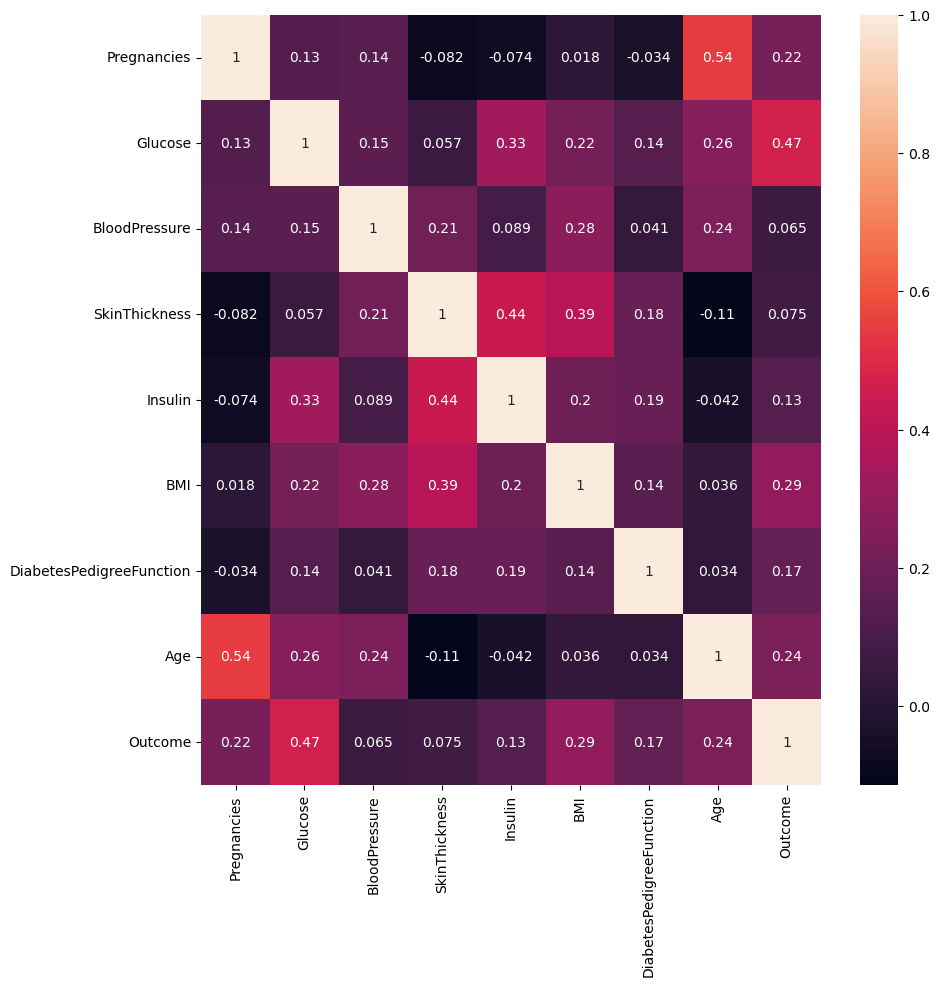

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

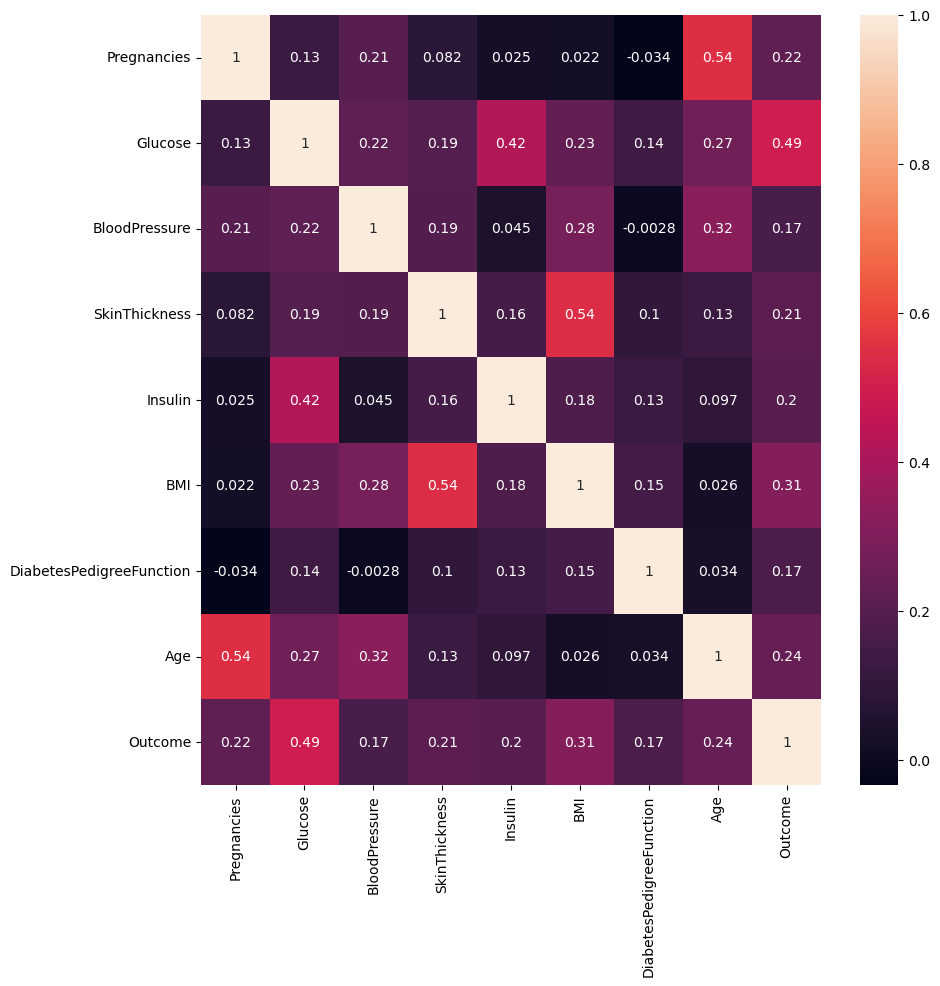

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_1.corr(),annot=True)

In [19]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [20]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(df_1.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [21]:
y=df_1.Outcome

In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Splitting data for train & test 

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [24]:
#KNN
test_score=[]
train_score=[]

for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [25]:
test_score

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [26]:
train_score

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [27]:
max_train_score=max(train_score)
train_score_index=[i for i,v in enumerate(train_score) if v==max_train_score]
print('Max train score {} % and k={}'.format(max_train_score*100,list(map(lambda x:x+1,train_score_index))))

Max train score 100.0 % and k=[1]


In [28]:
max_test_score=max(test_score)
test_score_index=[i for i,v in enumerate(test_score) if v==max_test_score]
print('Max test score {} % and k={}'.format(max_test_score*100,list(map(lambda x:x+1,test_score_index))))

Max test score 76.5625 % and k=[11]


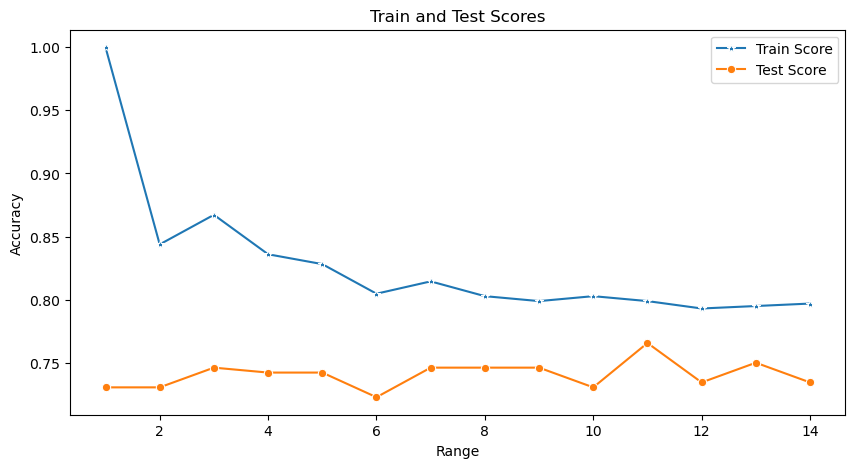

In [29]:

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=train_score, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_score, marker='o', label='Test Score')
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.title('Train and Test Scores')
plt.legend()
plt.show()


In [30]:
#plot decision boundary
from mlxtend.plotting import plot_decision_regions

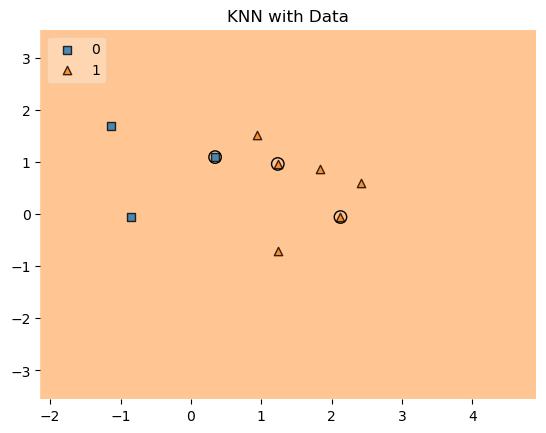

In [31]:
value=20000
width=20000

plot_decision_regions(X.values,y.values,clf=knn,legend=2,
                     filler_feature_values={2:value, 3:value, 4:value, 5:value ,6:value,7:value},
                     filler_feature_ranges={2:width, 3:width, 4:width, 5:width ,6:width, 7:width},
                     X_highlight=X_test.values)
plt.title("KNN with Data")
plt.show()

In [32]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0.5, 23.52222222222222, 'Predicted Label')

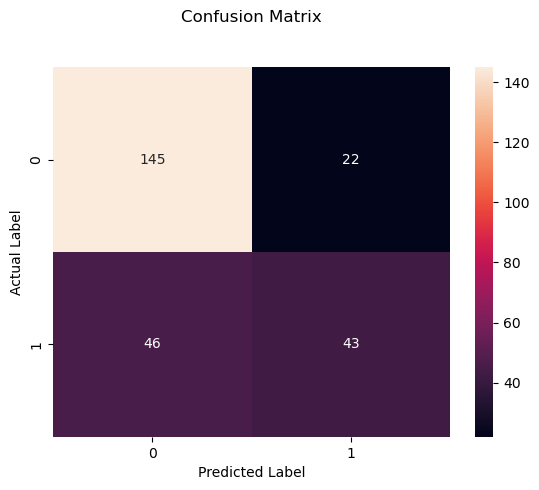

In [33]:

y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
c = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
plt.title("Confusion Matrix",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [34]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.66      0.48      0.56        89

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.68       256
weighted avg       0.73      0.73      0.72       256



In [35]:
#ROC-AUC curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)


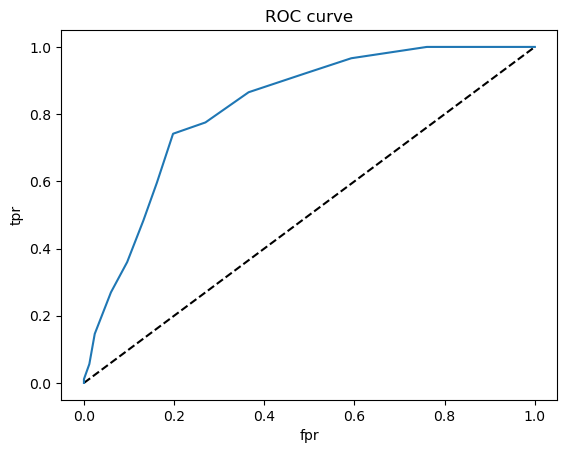

In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC curve")
plt.show()

In [37]:
roc_auc_score(y_test,y_pred_proba)

0.8215367018771446

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
#GridsearchCV
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param,cv=5)
knn_cv.fit(X,y)

print("Best Score:",str(knn_cv.best_score_))
print("Best parameter:",str(knn_cv.best_params_))

Best Score: 0.7721840251252015
Best parameter: {'n_neighbors': 25}
